import package yang digunakan

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk 
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from textblob import TextBlob
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from stop_words import get_stop_words

Load dari hasil crawling yang telah didapatkan (dalam bentuk csv) :

In [71]:
kolom = ['user','date','text','latitude','longitude']
df = pd.read_csv('coba2.csv')
df.head()

,user,date,text,latitude,longitude
0,sasmitha,Tue Aug 13 15:12:57 +0000 2019,My Contempelation....🙏🙏🙏🙏\n\n#universe #happy ...,-6.18030,106.82330
1,Cuwita250588,Tue Aug 13 15:10:27 +0000 2019,#kangdaniel #ihope #kpop #dancepractice #daeba...,-6.18030,106.82330
2,Jufffrieee,Tue Aug 13 15:09:07 +0000 2019,paha atas 😆😜#instaplace #place #world #asia #s...,-6.17148,106.82649
3,Galangpamunqkas,Tue Aug 13 14:54:47 +0000 2019,Lauv should make this kind of music if he real...,-6.18030,106.82330
4,Jufffrieee,Tue Aug 13 14:51:35 +0000 2019,👣👤#instaplace #place #world #asia #southeastas...,-6.17148,106.82649


Menghapus kolom yang tidak dibutuhkan

In [72]:
df.drop(['user','latitude','longitude'], axis = 1, inplace = True)

In [73]:
df.head()

,date,text
0,Tue Aug 13 15:12:57 +0000 2019,My Contempelation....🙏🙏🙏🙏\n\n#universe #happy ...
1,Tue Aug 13 15:10:27 +0000 2019,#kangdaniel #ihope #kpop #dancepractice #daeba...
2,Tue Aug 13 15:09:07 +0000 2019,paha atas 😆😜#instaplace #place #world #asia #s...
3,Tue Aug 13 14:54:47 +0000 2019,Lauv should make this kind of music if he real...
4,Tue Aug 13 14:51:35 +0000 2019,👣👤#instaplace #place #world #asia #southeastas...


Menghapus karakter (exp : @,#,!,0-9, dll) dan memisahkan perkata

In [74]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['text_punct'] = df['text'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text tokenized'] = df['text_punct'].apply(lambda x: tokenization(x.lower()))
df.head(8000)

,date,text,text_punct,text tokenized
0,Tue Aug 13 15:12:57 +0000 2019,My Contempelation....🙏🙏🙏🙏\n\n#universe #happy ...,My Contempelation🙏🙏🙏🙏\n\nuniverse happy love s...,"[my, contempelation, universe, happy, love, st..."
1,Tue Aug 13 15:10:27 +0000 2019,#kangdaniel #ihope #kpop #dancepractice #daeba...,kangdaniel ihope kpop dancepractice daebak Ja...,"[kangdaniel, ihope, kpop, dancepractice, daeba..."
2,Tue Aug 13 15:09:07 +0000 2019,paha atas 😆😜#instaplace #place #world #asia #s...,paha atas 😆😜instaplace place world asia southe...,"[paha, atas, instaplace, place, world, asia, s..."
3,Tue Aug 13 14:54:47 +0000 2019,Lauv should make this kind of music if he real...,Lauv should make this kind of music if he real...,"[lauv, should, make, this, kind, of, music, if..."
4,Tue Aug 13 14:51:35 +0000 2019,👣👤#instaplace #place #world #asia #southeastas...,👣👤instaplace place world asia southeastasia in...,"[, instaplace, place, world, asia, southeastas..."
5,Tue Aug 13 14:37:03 +0000 2019,Wish you happiness 💐💐💐\n😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭\n...,Wish you happiness 💐💐💐\n😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭\n...,"[wish, you, happiness, barakallahu, lakuma, wa..."
6,Tue Aug 13 14:30:54 +0000 2019,The origin of the Milky Way started when Zeus ...,The origin of the Milky Way started when Zeus ...,"[the, origin, of, the, milky, way, started, wh..."
7,Tue Aug 13 14:18:25 +0000 2019,Night Mode 🌙\n.\n.\n.\n#potrait #nightmode #hd...,Night Mode 🌙\n\n\n\npotrait nightmode hdr adob...,"[night, mode, potrait, nightmode, hdr, adobe, ..."
8,Tue Aug 13 14:15:54 +0000 2019,Ngasih kelas Musik Di SMKN 5 Jakarta Timur \n#...,Ngasih kelas Musik Di SMKN Jakarta Timur \nMu...,"[ngasih, kelas, musik, di, smkn, jakarta, timu..."
9,Tue Aug 13 14:14:04 +0000 2019,jendela UPVC\n085207888789☎️\n#upvcmurah #jen...,jendela UPVC\n☎️\nupvcmurah jendelaupvc upvcm...,"[jendela, upvc, upvcmurah, jendelaupvc, upvcmu..."


Mengambril daftar stopword dari packgace stopwod yang sudah di import

In [95]:
stopword = nltk.corpus.stopwords.words('english')

Menghapus kata stopword dalam tweet 

In [96]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['stopwords'] = df['text tokenized'].apply(lambda x: remove_stopwords(x))
df.head(8000)

,date,text,text_punct,text tokenized,stopwords
0,2019-08-13 15:12:57+00:00,My Contempelation....🙏🙏🙏🙏\n\n#universe #happy ...,My Contempelation🙏🙏🙏🙏\n\nuniverse happy love s...,"[my, contempelation, universe, happy, love, st...","[contempelation, universe, happy, love, story,..."
1,2019-08-13 15:10:27+00:00,#kangdaniel #ihope #kpop #dancepractice #daeba...,kangdaniel ihope kpop dancepractice daebak Ja...,"[kangdaniel, ihope, kpop, dancepractice, daeba...","[kangdaniel, ihope, kpop, dancepractice, daeba..."
2,2019-08-13 15:09:07+00:00,paha atas 😆😜#instaplace #place #world #asia #s...,paha atas 😆😜instaplace place world asia southe...,"[paha, atas, instaplace, place, world, asia, s...","[paha, atas, instaplace, place, world, asia, s..."
3,2019-08-13 14:54:47+00:00,Lauv should make this kind of music if he real...,Lauv should make this kind of music if he real...,"[lauv, should, make, this, kind, of, music, if...","[lauv, make, kind, music, really, tired, love,..."
4,2019-08-13 14:51:35+00:00,👣👤#instaplace #place #world #asia #southeastas...,👣👤instaplace place world asia southeastasia in...,"[, instaplace, place, world, asia, southeastas...","[, instaplace, place, world, asia, southeastas..."
5,2019-08-13 14:37:03+00:00,Wish you happiness 💐💐💐\n😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭\n...,Wish you happiness 💐💐💐\n😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭\n...,"[wish, you, happiness, barakallahu, lakuma, wa...","[wish, happiness, barakallahu, lakuma, wabarak..."
6,2019-08-13 14:30:54+00:00,The origin of the Milky Way started when Zeus ...,The origin of the Milky Way started when Zeus ...,"[the, origin, of, the, milky, way, started, wh...","[origin, milky, way, started, zeus, decided, l..."
7,2019-08-13 14:18:25+00:00,Night Mode 🌙\n.\n.\n.\n#potrait #nightmode #hd...,Night Mode 🌙\n\n\n\npotrait nightmode hdr adob...,"[night, mode, potrait, nightmode, hdr, adobe, ...","[night, mode, potrait, nightmode, hdr, adobe, ..."
8,2019-08-13 14:15:54+00:00,Ngasih kelas Musik Di SMKN 5 Jakarta Timur \n#...,Ngasih kelas Musik Di SMKN Jakarta Timur \nMu...,"[ngasih, kelas, musik, di, smkn, jakarta, timu...","[ngasih, kelas, musik, di, smkn, jakarta, timu..."
9,2019-08-13 14:14:04+00:00,jendela UPVC\n085207888789☎️\n#upvcmurah #jen...,jendela UPVC\n☎️\nupvcmurah jendelaupvc upvcm...,"[jendela, upvc, upvcmurah, jendelaupvc, upvcmu...","[jendela, upvc, upvcmurah, jendelaupvc, upvcmu..."


Range data yang olah

In [97]:
print(f" Data Available since {df.date.min()}")
print(f" Data Available upto {df.date.max()}")

 Data Available since 2019-08-04 15:17:13+00:00
 Data Available upto 2019-08-13 15:12:57+00:00


Mengeluarkan Hasil dalam Bentuk Grafik

2019-08-04      3
2019-08-05     17
2019-08-06    348
2019-08-07    319
2019-08-08    284
2019-08-09    189
2019-08-10    193
2019-08-11    303
2019-08-12    241
2019-08-13    189
Name: date, dtype: int64


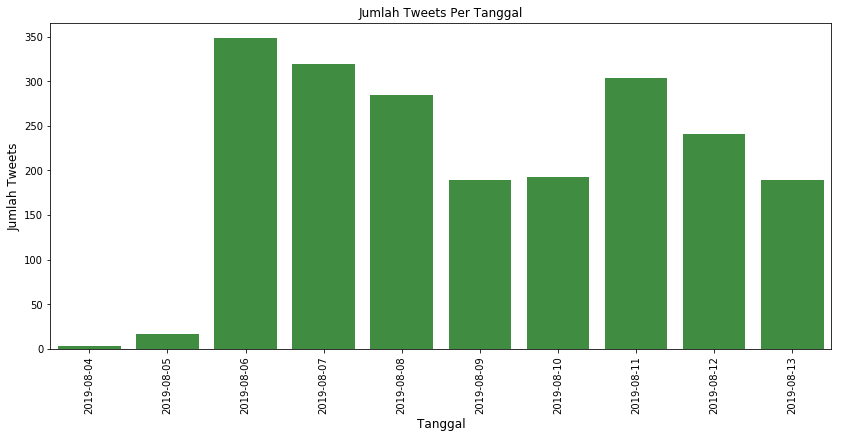

In [81]:
df['date'] =  pd.to_datetime(df['date'])
cnt_srs = df['date'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Tweets', fontsize=12)
plt.title("Jumlah Tweets Per Tanggal")

print(cnt_srs)

Menghitung rata-rata tweet dalam sepakan terakhir di Jakarta

In [99]:
print(cnt_srs.values.mean())

208.6


Menghitung jumlah tweets per menit

In [85]:
cnt_ = df['date'].value_counts()
cnt_ = cnt_.sort_index() 
trace1 = go.Scatter(
                    x = cnt_.index,
                    y = cnt_.values,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
                    )

data = [trace1]
layout = dict(title = 'Number of tweets per menit',
              xaxis= dict(title= 'Tweets per menit',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

#print(cnt_)

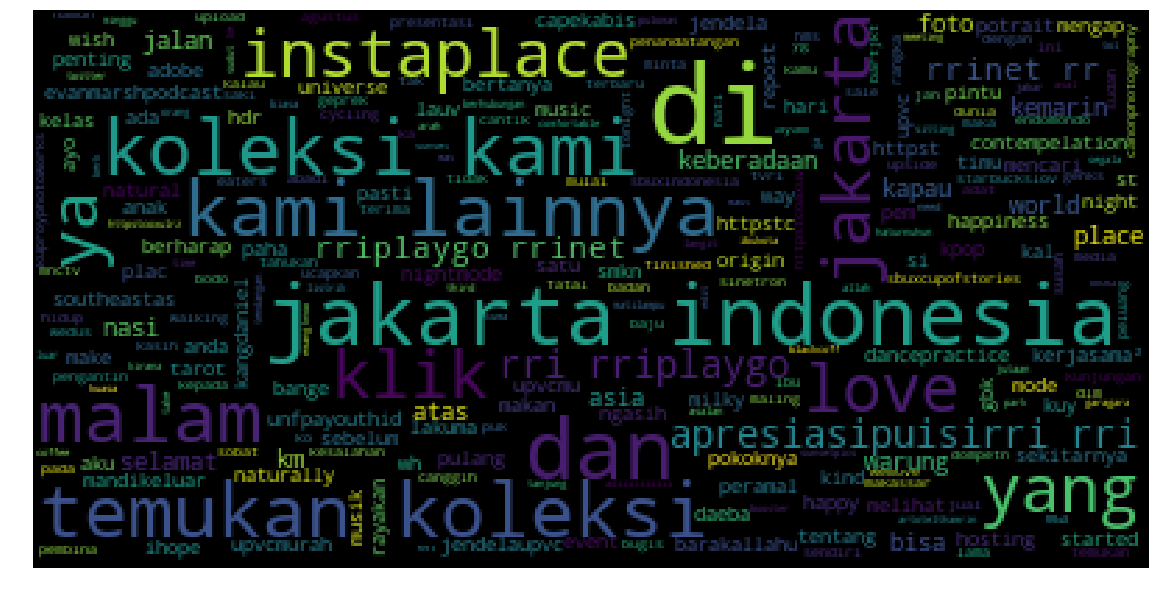

0       [my, contempelation, universe, happy, love, st...
1       [kangdaniel, ihope, kpop, dancepractice, daeba...
2       [paha, atas, instaplace, place, world, asia, s...
3       [lauv, should, make, this, kind, of, music, if...
4       [, instaplace, place, world, asia, southeastas...
5       [wish, you, happiness, barakallahu, lakuma, wa...
6       [the, origin, of, the, milky, way, started, wh...
7       [night, mode, potrait, nightmode, hdr, adobe, ...
8       [ngasih, kelas, musik, di, smkn, jakarta, timu...
9       [jendela, upvc, upvcmurah, jendelaupvc, upvcmu...
10      [evanmarshpodcast, jakarta, indonesia, httpstc...
11      [pintu, gbk, dan, sekitarnya, instaplace, plac...
12      [apresiasipuisirri, rri, rriplaygo, rrinet, rr...
13      [apresiasipuisirri, rri, rriplaygo, rrinet, rr...
14      [, selamat, malam, aku, berharap, melihat, kal...
15      [apresiasipuisirri, rri, rriplaygo, rrinet, rr...
16      [pokoknya, i, love, you, jakarta, indonesia, h...
17      [anda,

In [92]:
wordcloud__ = WordCloud(
                          background_color='black',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['text tokenized'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
cloud_plot(wordcloud__)

print(str(df['text tokenized'].dropna()))

In [69]:
from stop_words import get_stop_words

stop_words = get_stop_words('ina')

from stop_words import safe_get_stop_words

stop_words = safe_get_stop_words('ina')

StopWordError: ina" language is unavailable.

In [ ]:
git clone --recursive git://github.com/Alir3z4/python-stop-words.git